# Урок 7. Многомерный статистический анализ.  Линейная регрессия

## Выполнил - Колеганов Н.Д.

# Задание

**Задача 1**

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],

[-0.18757272, 1.30337355, 5.12093014, 3.46363202],

[-0.81094525, 1.82463398, 5.79686488, 1.86159445],

[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],

[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],

[-0.62972637, 0.77750764, 2.84124027, 4.54410559],

[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],

[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],

[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],

[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

**Задача 2**

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

**Задача 3**

**Квартет Энскомба** — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
  
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

По каждой паре выборок посчитайте:

* выборочное среднее и дисперсию каждой выборки,
* коэффициент корреляции Пирсона и прямую линейной регрессии.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from itertools import combinations

plt.style.use('seaborn-whitegrid')

### **Задача 1** 

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],

[-0.18757272, 1.30337355, 5.12093014, 3.46363202],

[-0.81094525, 1.82463398, 5.79686488, 1.86159445],

[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],

[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],

[-0.62972637, 0.77750764, 2.84124027, 4.54410559],

[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],

[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],

[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],

[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

## *Решение*

In [2]:
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]

In [3]:
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]

In [4]:
X = np.array(X)
y = np.array(y)

$
b = (X^\top X)^{-1} X^\top Y\\
Z = X \cdot b\\
\varepsilon = y - Z\\
R^2 = 1 - \dfrac{D(\varepsilon)}{D(y)}
$
$R^2 = 1 - \dfrac{SS_{res}}{SS_{y}}$

In [5]:
def R2(x:np.ndarray, y:np.ndarray):
    
    ones = np.ones((x.shape[0],1))
    x = np.hstack([ones, x])
    
    XTX = x.T.dot(x)
    XTX_inv = np.linalg.inv(XTX)
    
    b = XTX_inv.dot(x.T).dot(y)
    
    z = x.dot(b)
    e = y - z
    
    return 1 - e.var() / y.var()

In [6]:
R2(x=X,y=y)

1.0

In [7]:
for i, j in combinations(range(X.shape[1]), 2):
    r = R2(X[:, [i,j]], y)
    print(i, j, r)

0 1 0.18113594742585215
0 2 0.7634246238793152
0 3 0.4532966783144077
1 2 0.547948273403901
1 3 0.6062055761129931
2 3 0.622441987650532


**Ответ:** Линейная рекрессия имеет наилучший результат в 1м и 3м признаках.

$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)}$

In [8]:
k1 = 2
k2 = X.shape[0]- 2 - 1

R2 = R2(X[:, [0,2]], y)

F = (R2 / k1) / ((1 - R2) / k2)
F

11.29443912292265

In [9]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588


$\Omega_\alpha = (4.74, \infty)$

In [10]:
F>=t

True

**Ответ:** Статистика попала в критическую область, уравнение регрессии признаётся значимым.

### **Задача 2** 

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

## *Решение*

$
Y_k = 2\\
\overline{Y}_1 = \frac{77}{2509}\\
n_1 = 2509\\
\overline{Y}_2 = \frac{60}{1465}\\
n_2 = 1465\\
H_0: \overline{Y}_1 = \overline{Y}_2\\
H_1: \overline{Y}_1 \neq \overline{Y}_2
$

In [11]:
y1 = np.zeros(2509)
y1[np.arange(77)] = 1

y2 = np.zeros(1465)
y2[np.arange(60)] = 1

y = np.concatenate([y1, y2])

In [12]:
n1 = y1.shape[0]
n2 = y2.shape[0]
n = n1+n2

n1, n2

(2509, 1465)

In [13]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y_mean = y.mean()

y1_mean, y2_mean, y_mean

(0.03068951773614986, 0.040955631399317405, 0.03447408152994464)

$
SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i\\
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2
$

In [14]:
SSb = n1*(y1_mean - y_mean)**2 + n2*(y2_mean - y_mean)**2
SSw = ((y1 - y1_mean)**2).sum() + ((y2 - y2_mean)**2).sum()

SSb, SSw

(0.09748158004016791, 132.17956925035745)


$
\sigma_b^2 = \dfrac{SS_b}{k - 1}\\ 
\sigma_w^2 = \dfrac{SS_w}{n - k}
$

In [15]:
k = 2
k1 = k-1
k2 = n-k

sigma2b = SSb/k1
sigma2w = SSw/k2

sigma2b, sigma2w

(0.09748158004016791, 0.03327783717279895)

$F = \dfrac{\sigma_b^2}{\sigma_w^2}$

In [16]:
F = sigma2b/sigma2w
F

2.9293243889013496

In [17]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

$\Omega_\alpha = \left( 3.84, \infty \right)$

In [18]:
F>=t

False

**Значение статистики попало в критическую область, поэтому заключаем, отличие конверсии на страницах A и B является значимым.**

### **Задача 3**

**Квартет Энскомба** — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
  
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

По каждой паре выборок посчитайте:

* выборочное среднее и дисперсию каждой выборки,
* коэффициент корреляции Пирсона и прямую линейной регрессии.

## *Решение*

In [19]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

Сравним среднее

In [20]:
x1.mean(), x2.mean(), x3.mean(), x4.mean()

(9.0, 9.0, 9.0, 9.0)

In [21]:
y1.mean(), y2.mean(), y3.mean(), y4.mean()

(7.500909090909093, 7.50090909090909, 7.5, 7.500909090909091)

Сравним дисперсию

In [22]:
x1.var(), x2.var(), x3.var(), x4.var()

(10.0, 10.0, 10.0, 10.0)

In [23]:
y1.var(), y2.var(), y3.var(), y4.var()

(3.7520628099173554, 3.752390082644628, 3.747836363636364, 3.7484082644628103)

Посчитаем линейную регрессию

In [24]:
b11 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
b12 = np.cov(x2, y2, ddof=1)[0, 1] / np.var(x2, ddof=1)
b13 = np.cov(x3, y3, ddof=1)[0, 1] / np.var(x3, ddof=1)
b14 = np.cov(x4, y4, ddof=1)[0, 1] / np.var(x4, ddof=1)

In [25]:
b11, b12, b13, b14

(0.5000909090909093,
 0.5000000000000001,
 0.49972727272727285,
 0.49990909090909086)

In [26]:
b01 = y1.mean() - b11 * x1.mean()
b02 = y2.mean() - b12 * x2.mean()
b03 = y3.mean() - b13 * x3.mean()
b04 = y4.mean() - b14 * x4.mean()

In [27]:
b01, b02, b03, b04

(3.0000909090909094, 3.000909090909089, 3.002454545454544, 3.0017272727272735)

Уравнения регрессии

$$y1 = 3,0001 + 0,5001 \cdot x1$$$$y2 = 3,0009 + 0,5000 \cdot x2$$$$y3 = 3,0025 + 0,4997 \cdot x3$$$$y4 = 3,0017 + 0,4999 \cdot x4$$
Посчитаем коэффициент корреляции Пирсона

In [28]:
np.corrcoef(x1, y1)[0, 1], np.corrcoef(x2, y2)[0, 1], np.corrcoef(x3, y3)[0, 1], np.corrcoef(x4, y4)[0, 1]

(0.81642051634484, 0.8162365060002428, 0.8162867394895984, 0.8165214368885028)

Построим графики

In [29]:
def plot_regr(x, b0, b1, y):
    x0 = np.array(x)
    np.sort(x0)
    z = b0 + b1 * x0
    plt.scatter(x, y)
    plt.plot(x0, z, color='red', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y');

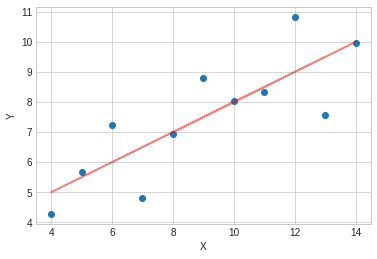

In [30]:
plot_regr(x1, b01, b11, y1)

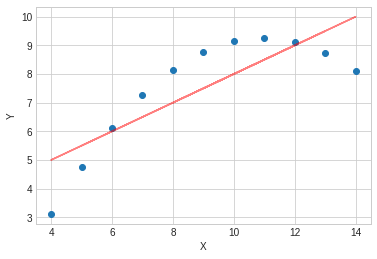

In [31]:
plot_regr(x2, b02, b12, y2)

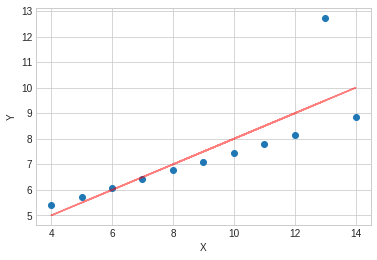

In [32]:
plot_regr(x3, b03, b13, y3)

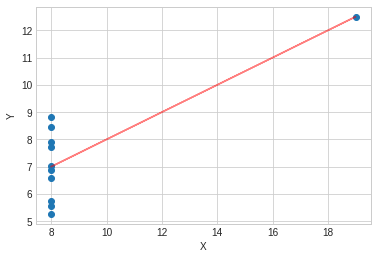

In [33]:
plot_regr(x4, b04, b14, y4)